Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Accuracy on training set: 0.77
Accuracy on test set: 0.77
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       125
           1       0.67      0.67      0.67        67

   micro avg       0.77      0.77      0.77       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.77      0.77      0.77       192

0.7708333333333334


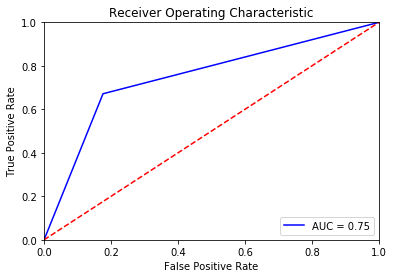

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings;
warnings.simplefilter('ignore')
%matplotlib inline
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.columns)
from sklearn.svm import SVC
svc = SVC()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))
y_pred =svc.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
